#Análisis de Ventas - Challenge Data Science

### Importación de datos



In [102]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [97]:
print(df_total.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda',
       'Facturación'],
      dtype='object')


In [89]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


In [90]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [91]:
df_total['Facturación'] = df_total['Precio'] + df_total['Costo de envío']


In [92]:
facturacion_tienda = df_total.groupby('Tienda')['Facturación'].sum().sort_values(ascending=False)

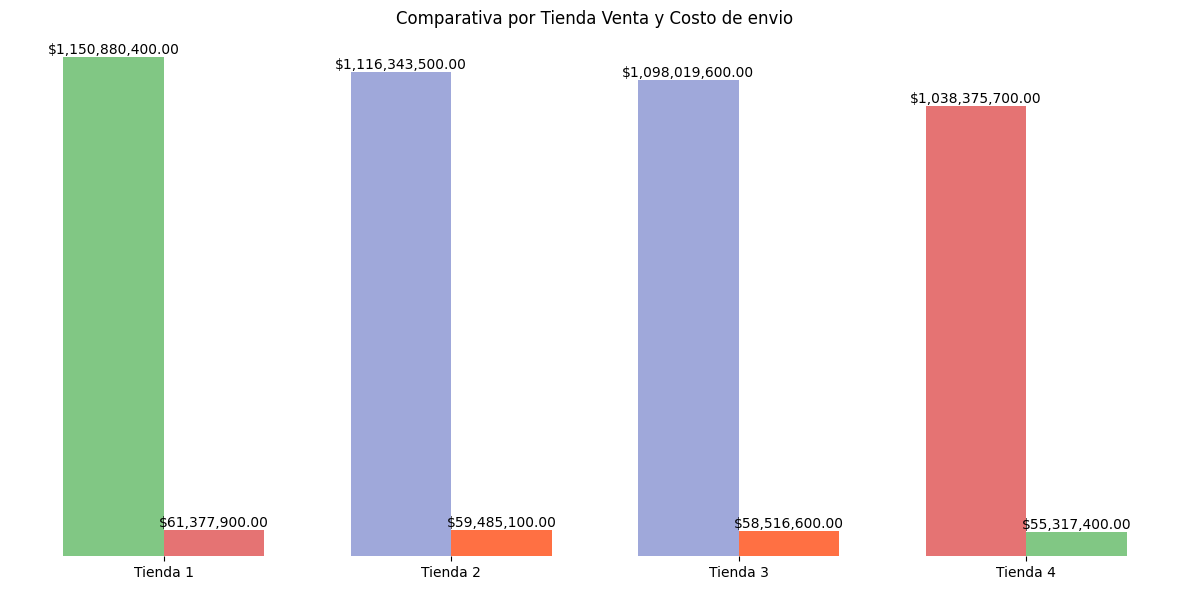

In [134]:

facturacion_tienda = df_total.groupby('Tienda')[['Precio', 'Costo de envío']].sum()
tiendas = list(facturacion_tienda.index)
x = range(len(tiendas))
ancho = 0.35


colores_precio = ['#9fa8da'] * len(tiendas)
colores_envio = ['#ff7043'] * len(tiendas)


colores_precio[tiendas.index(facturacion_tienda['Precio'].idxmax())] = '#81c784'
colores_precio[tiendas.index(facturacion_tienda['Precio'].idxmin())] = '#e57373'
colores_envio[tiendas.index(facturacion_tienda['Costo de envío'].idxmax())] = '#e57373'
colores_envio[tiendas.index(facturacion_tienda['Costo de envío'].idxmin())] = '#81c784'


fig, ax = plt.subplots(figsize=(12, 6))


ax.bar([i - ancho/2 for i in x], facturacion_tienda['Precio'],
       width=ancho, color=colores_precio)
ax.bar([i + ancho/2 for i in x], facturacion_tienda['Costo de envío'],
       width=ancho, color=colores_envio)


for i, (precio, envio) in enumerate(zip(facturacion_tienda['Precio'], facturacion_tienda['Costo de envío'])):
    ax.text(x[i] - ancho/2, precio, f"${precio:,.2f}", ha='center', va='bottom')
    ax.text(x[i] + ancho/2, envio, f"${envio:,.2f}", ha='center', va='bottom')


ax.set_title('Comparativa por Tienda Venta y Costo de envio')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)


ax.yaxis.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

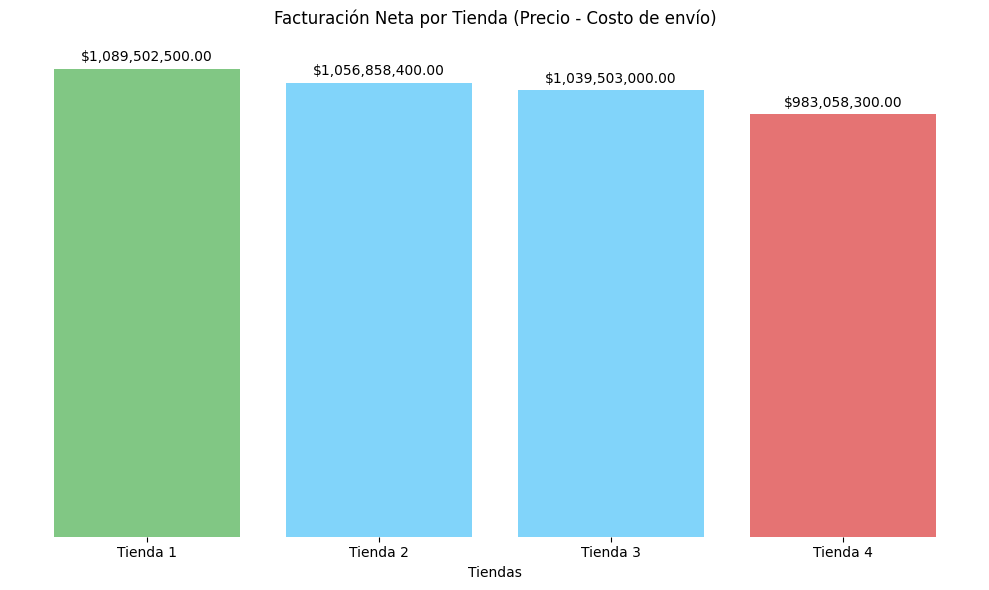

In [145]:

facturacion_neta_tienda = (
    df_total.groupby('Tienda')
    .agg(Facturación_Total=('Precio', 'sum'), Costo_Total=('Costo de envío', 'sum'))
    .eval('Facturacion_Neta = Facturación_Total - Costo_Total')
    ['Facturacion_Neta']
)


colores = ['#81d4fa'] * len(facturacion_neta_tienda)
colores[facturacion_neta_tienda.argmax()] = '#81c784'
colores[facturacion_neta_tienda.argmin()] = '#e57373'


plt.figure(figsize=(10, 6))
bars = plt.bar(facturacion_neta_tienda.index, facturacion_neta_tienda, color=colores)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01,
             f"${height:,.2f}", ha='center', va='bottom', fontsize=10)


ax = plt.gca()
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Facturación Neta por Tienda (Precio - Costo de envío)', pad=15)
plt.xlabel('Tiendas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda